In [ ]:

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:

color_1 = '#BFAF9D'
color_2 = '#C1C1D5'
color_3 = '#A16F86'
color_4 = sns.diverging_palette(h_neg = 32, h_pos = 32, s = 21, l = 68, as_cmap = True)

---
### **Data loading and initial review**

In [3]:

df = pd.read_csv('../input/python-project-on-weather-dataset/Weather Data.csv')

In [4]:

df.shape

(8784, 8)

In [5]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [6]:

df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [7]:

df.tail()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow
8783,12/31/2012 23:00,0.0,-2.1,86,30,11.3,99.89,Snow


---
### **Data reorganization and cleansing**

In [8]:

df.columns = ['Datetime', 'Temp [C]', 'Dew Point Temp [C]', 'Rel Hum [%]', 'Wind Speed [km/h]', 'Visibility [km]', 'Press [kPa]', 'Weather']

df.index = pd.to_datetime(df['Datetime']).dt.floor('T')
df = df.iloc[:, 1:]

df.drop(df[df.isnull().any(axis = 1)].index, inplace = True)

df.drop_duplicates(inplace = True)

weather_split = ['Weather - p. 1', 'Weather - p. 2', 'Weather - p. 3']
df[weather_split] = df['Weather'].str.split(',', expand = True)
df.drop(['Weather'], axis = 1, inplace = True)

weather_category_list = np.array([])

for column in df[weather_split]:
    weather_category_list = np.append(weather_category_list, df[weather_split][column].unique())

weather_category_list = weather_category_list[weather_category_list != None]
weather_category_list = np.unique(weather_category_list)

df[weather_category_list] = 0

for column in df[weather_split]:
    for index in df[weather_split].index:
        if df.loc[index, column] != None:
            df.at[index, df.loc[index, column]] = df.loc[index, df.loc[index, column]] + 1

df.drop(weather_split, axis = 1, inplace = True)

weather_measurement_data = ['Temp [C]', 'Dew Point Temp [C]', 'Rel Hum [%]', 'Wind Speed [km/h]', 'Visibility [km]', 'Press [kPa]']

In [9]:

df.head(5)

,Temp [C],Dew Point Temp [C],Rel Hum [%],Wind Speed [km/h],Visibility [km],Press [kPa],Blowing Snow,Clear,Cloudy,Drizzle,...,Moderate Rain Showers,Moderate Snow,Mostly Cloudy,Rain,Rain Showers,Snow,Snow Grains,Snow Pellets,Snow Showers,Thunderstorms
Datetime,,,,,,,,,,,,,,,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The last column, which contained information on recorded weather phenomena, was separated and coded in the 0-1 system (dummy variables)

In [10]:

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8784 entries, 2012-01-01 00:00:00 to 2012-12-31 23:00:00
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Temp [C]               8784 non-null   float64
 1   Dew Point Temp [C]     8784 non-null   float64
 2   Rel Hum [%]            8784 non-null   int64  
 3   Wind Speed [km/h]      8784 non-null   int64  
 4   Visibility [km]        8784 non-null   float64
 5   Press [kPa]            8784 non-null   float64
 6   Blowing Snow           8784 non-null   int64  
 7   Clear                  8784 non-null   int64  
 8   Cloudy                 8784 non-null   int64  
 9   Drizzle                8784 non-null   int64  
 10  Fog                    8784 non-null   int64  
 11  Freezing Drizzle       8784 non-null   int64  
 12  Freezing Fog           8784 non-null   int64  
 13  Freezing Rain          8784 non-null   int64  
 14  Haze                

In [11]:

df[weather_measurement_data].describe()

,Temp [C],Dew Point Temp [C],Rel Hum [%],Wind Speed [km/h],Visibility [km],Press [kPa]
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


---
### **Basic data visualization**

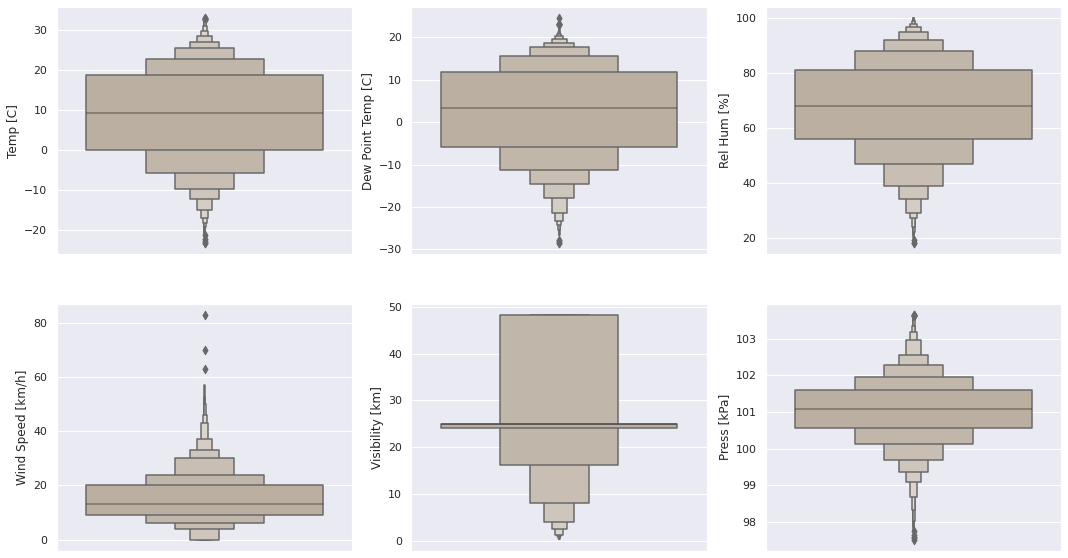

In [12]:

plt.figure(figsize = (18, 10))

plt.subplot(231)
sns.boxenplot(data = df, y = 'Temp [C]', color = color_1)

plt.subplot(232)
sns.boxenplot(data = df, y = 'Dew Point Temp [C]', color = color_1)

plt.subplot(233)
sns.boxenplot(data = df, y = 'Rel Hum [%]', color = color_1)

plt.subplot(234)
sns.boxenplot(data = df, y = 'Wind Speed [km/h]', color = color_1)

plt.subplot(235)
sns.boxenplot(data = df, y = 'Visibility [km]', color = color_1)

plt.subplot(236)
sns.boxenplot(data = df, y = 'Press [kPa]', color = color_1)

plt.show()

In [13]:

for column in df[weather_measurement_data]:
    df['SMA168 ' + column] = df[column].rolling('168h', center = True).mean()

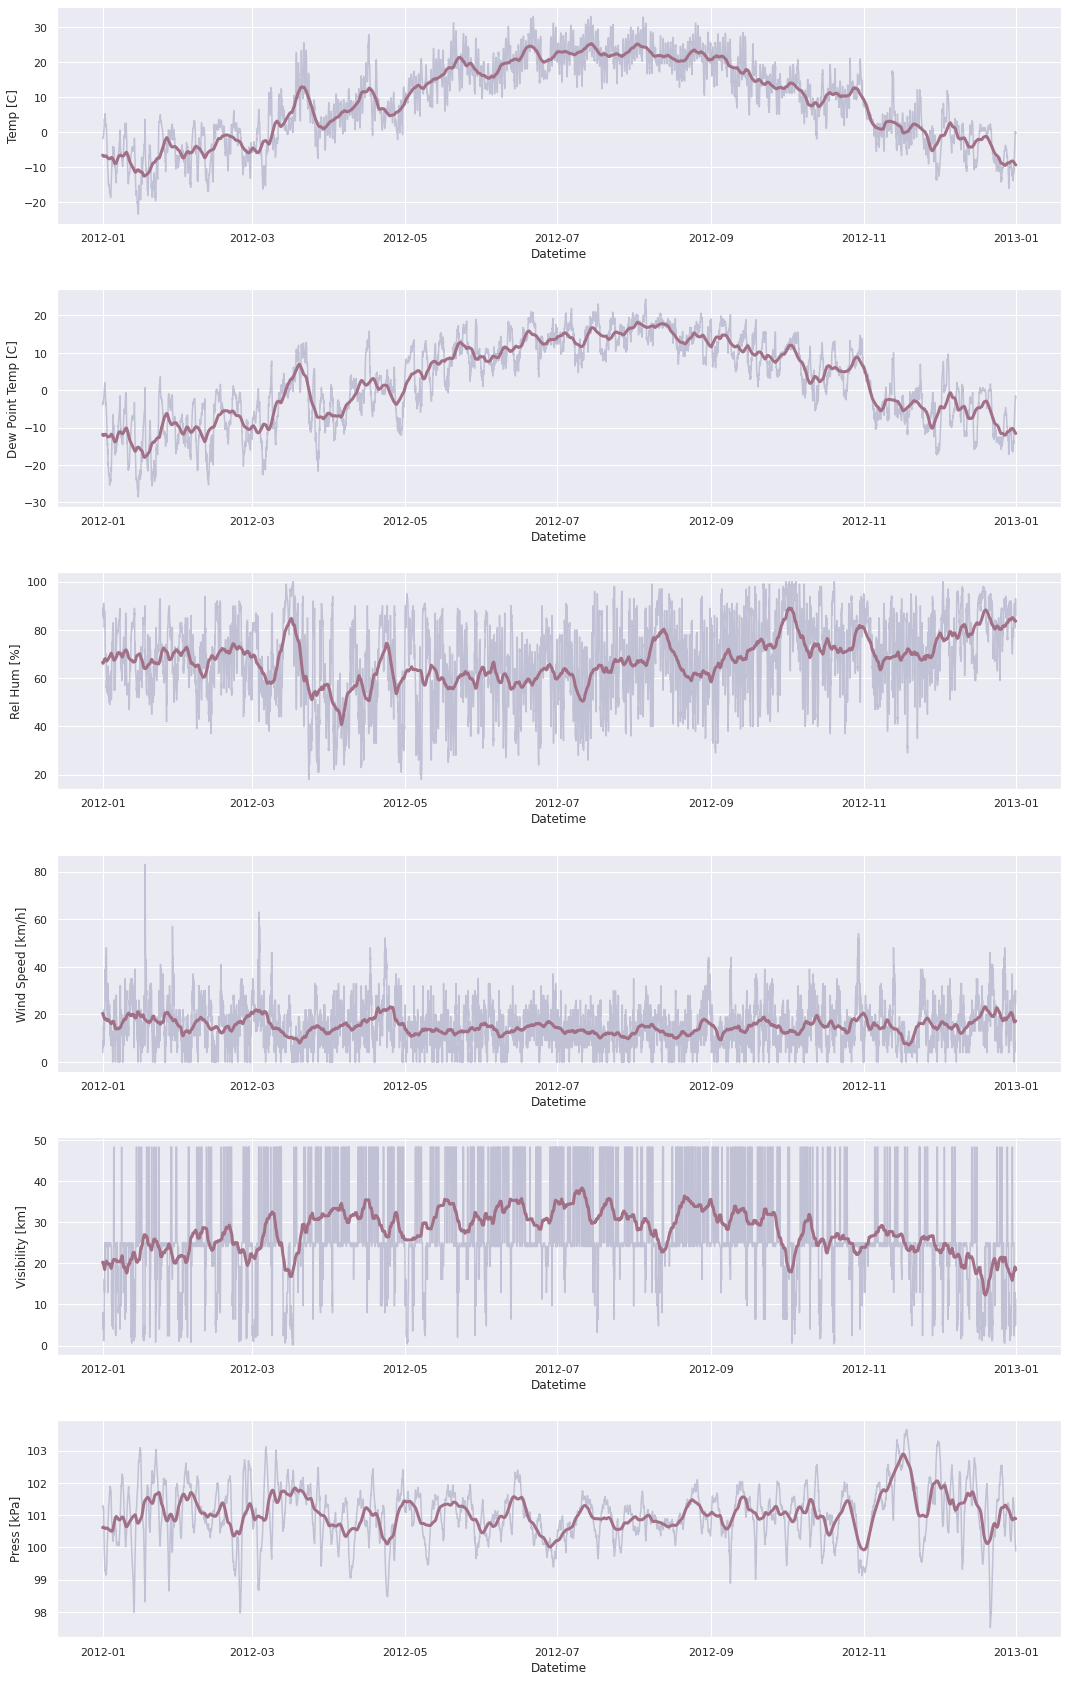

In [14]:

plt.figure(figsize = (18, 30))

plt.subplot(611)
sns.lineplot(data = df, x = 'Datetime', y = 'Temp [C]', color = color_2)
sns.lineplot(data = df, x = 'Datetime', y = 'SMA168 Temp [C]', color = color_3, lw = 3)

plt.subplot(612)
sns.lineplot(data = df, x = 'Datetime', y = 'Dew Point Temp [C]', color = color_2)
sns.lineplot(data = df, x = 'Datetime', y = 'SMA168 Dew Point Temp [C]', color = color_3, lw = 3)

plt.subplot(613)
sns.lineplot(data = df, x = 'Datetime', y = 'Rel Hum [%]', color = color_2)
sns.lineplot(data = df, x = 'Datetime', y = 'SMA168 Rel Hum [%]', color = color_3, lw = 3)

plt.subplot(614)
sns.lineplot(data = df, x = 'Datetime', y = 'Wind Speed [km/h]', color = color_2)
sns.lineplot(data = df, x = 'Datetime', y = 'SMA168 Wind Speed [km/h]', color = color_3, lw = 3)

plt.subplot(615)
sns.lineplot(data = df, x = 'Datetime', y = 'Visibility [km]', color = color_2)
sns.lineplot(data = df, x = 'Datetime', y = 'SMA168 Visibility [km]', color = color_3, lw = 3)

plt.subplot(616)
sns.lineplot(data = df, x = 'Datetime', y = 'Press [kPa]', color = color_2)
sns.lineplot(data = df, x = 'Datetime', y = 'SMA168 Press [kPa]', color = color_3, lw = 3)

plt.subplots_adjust(hspace = 0.3)
plt.show()

---
### **Regression algorithms**

The following is a case of using machine learning algorithms to predict visibility based on other collected measurement data such as temperature, humidity, air pressure, time of day, or precipitation occurrence information.

The data used by the machine learning algorithms has been properly prepared, i.e. it has been scaled using the StandardScaler() function of the *scikit-learn* module.

> Take a look: http://scikit-learn.org/stable/modules/preprocessing.html

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [16]:
df['Datetime (month)'] = pd.to_datetime(df.index).month
df['Datetime (day)'] = pd.to_datetime(df.index).day
df['Datetime (hour)'] = pd.to_datetime(df.index).hour

param_ml_input = ['Datetime (month)', 'Datetime (day)', 'Datetime (hour)', 'Temp [C]', 'Rel Hum [%]', 'Press [kPa]', 'Fog', 'Rain', 'Snow']
param_ml_output = 'Visibility [km]'

In [17]:
X_data = df[param_ml_input]
y_data = df[param_ml_output]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 1/3)

In [18]:
scaler =  StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### **Neural Network**
Machine Learning > Supervised Learning > Regression > Neural Network

> Take a look: http://scikit-learn.org/stable/modules/neural_networks_supervised.html

In [19]:
from sklearn.neural_network import MLPRegressor

In [20]:
mlp = MLPRegressor(max_iter = 5000).fit(X_train_scaled, y_train)
y_pred = mlp.predict(X_test_scaled)

In [21]:
result = pd.DataFrame({'Actual value (y_test)': y_test,
                       'Value predicted by the model (y_pred)': y_pred,
                       'Difference': abs(y_pred - y_test)})
result.head()

,Actual value (y_test),Value predicted by the model (y_pred),Difference
Datetime,,,
2012-09-03 20:00:00,25.0,34.699244,9.699244
2012-07-30 21:00:00,25.0,27.305372,2.305372
2012-01-12 14:00:00,1.2,5.933876,4.733876
2012-02-22 18:00:00,24.1,22.716810,1.383190
2012-11-05 11:00:00,48.3,41.102512,7.197488


In [22]:
result.describe()[result.describe().index != 'count']

,Actual value (y_test),Value predicted by the model (y_pred),Difference
mean,27.618852,27.544820,5.429605
std,12.594030,10.073109,5.135170
min,0.200000,-0.724678,0.004251
25%,24.100000,22.697186,1.555117
50%,25.000000,26.466774,3.680573
75%,25.000000,33.465056,7.947387
max,48.300000,52.455639,28.073384


#### **Random Forest**
Machine Learning > Supervised Learning > Regression > Random Forest

> Take a look: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [23]:
from sklearn.ensemble import RandomForestRegressor

In [24]:
rfr = RandomForestRegressor().fit(X_train_scaled, y_train)
y_pred = rfr.predict(X_test_scaled)

In [25]:
result = pd.DataFrame({'Actual value (y_test)': y_test,
                       'Value predicted by the model (y_pred)': y_pred,
                       'Difference': abs(y_pred - y_test)})
result.head()

,Actual value (y_test),Value predicted by the model (y_pred),Difference
Datetime,,,
2012-09-03 20:00:00,25.0,29.597,4.597
2012-07-30 21:00:00,25.0,25.169,0.169
2012-01-12 14:00:00,1.2,2.933,1.733
2012-02-22 18:00:00,24.1,23.145,0.955
2012-11-05 11:00:00,48.3,43.218,5.082


In [26]:
result.describe()[result.describe().index != 'count']

,Actual value (y_test),Value predicted by the model (y_pred),Difference
mean,27.618852,27.601068,3.904626
std,12.594030,10.577016,5.086516
min,0.200000,0.489000,0.000000
25%,24.100000,24.181250,0.250750
50%,25.000000,25.206000,1.691500
75%,25.000000,33.027750,5.741250
max,48.300000,48.300000,29.856000


#### **Summary**

In [27]:
date_set = '2012-06-01 14:00:00'

X_data_summary = df[param_ml_input][df.index == date_set]
y_data_summary = df[param_ml_output][df.index == date_set]

In [28]:
print('For the selected date -', date_set, '- the actual visibility measurement was', y_data_summary[0])
print('The predicted value according to the model #1 (neural network) is', mlp.predict(scaler.transform(X_data_summary))[0])
print('The predicted value according to the model #2 (random forest) is', rfr.predict(scaler.transform(X_data_summary))[0])
print()
print('The machine learning models were based on data: Datetime, Temp [C], Rel Hum [%], Press [kPa], Fog, Rain, Snow.')

For the selected date - 2012-06-01 14:00:00 - the actual visibility measurement was 48.3
The predicted value according to the model #1 (neural network) is 47.79169343739235
The predicted value according to the model #2 (random forest) is 48.3000000000001

The machine learning models were based on data: Datetime, Temp [C], Rel Hum [%], Press [kPa], Fog, Rain, Snow.


**Thank you!** If you have any questions - feel free to post in the comments section below.